User Posts and visual content Sentiment Analysis using Tensorflow and sequential model

4233
['pos-0126.jpeg', 'neu-1345.jpeg', 'pos-1047.jpeg', 'neu-0493.jpeg', 'neg-0245.jpeg', 'neu-0406.jpeg', 'pos-0778.jpeg', 'neu-0121.jpeg', 'pos-0112.jpeg', 'pos-1597.jpeg', 'neg-0880.jpeg', 'neu-0381.jpeg', 'neu-1370.jpeg', 'neg-0940.jpeg', 'neu-0810.jpeg', 'pos-1186.jpeg', 'pos-0317.jpeg', 'neg-0763.jpeg', 'pos-1549.jpeg', 'pos-0468.jpeg', 'neu-0282.jpeg', 'pos-1373.jpeg', 'neg-0605.jpeg', 'neu-1219.jpeg', 'neg-0650.jpeg', 'pos-0786.jpeg', 'pos-1017.jpeg', 'pos-0795.jpeg', 'pos-0604.jpeg', 'neu-0510.jpeg', 'neg-0642.jpeg', 'pos-0982.jpeg', 'pos-1581.jpeg', 'neu-0655.jpeg', 'pos-0765.jpeg', 'neg-0577.jpeg', 'neu-0409.jpeg', 'neg-0772.jpeg', 'neu-0075.jpeg', 'pos-1173.jpeg', 'neu-0793.jpeg', 'neg-1051.jpeg', 'neu-1308.jpeg', 'neg-0795.jpeg', 'neg-0359.jpeg', 'neu-0580.jpeg', 'pos-1268.jpeg', 'pos-1323.jpeg', 'neg-0257.jpeg', 'neu-1435.jpeg', 'neu-0097.jpeg', 'neg-0298.jpeg', 'pos-0398.jpeg', 'pos-0157.jpeg', 'neg-0888.jpeg', 'neu-0157.jpeg', 'neg-1246.jpeg', 'pos-1021.jpeg', 'neg-008

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


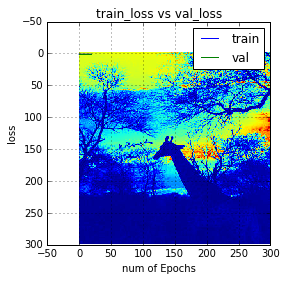

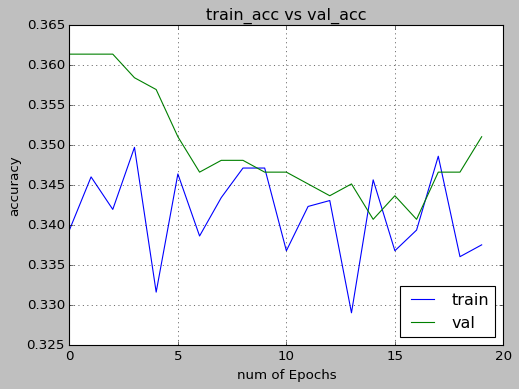

In [ ]:

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD,RMSprop,adam
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *

from sklearn.utils import shuffle
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split


img_rows, img_cols = 300, 300
img_channels = 1

path1 = "/content/drive/MyDrive/images"
path2 = "/content/drive/MyDrive/images_resized"


listing = os.listdir(path1) 
num_samples=size(listing)
print(num_samples)
print(listing)
listing.sort()
print("sorted", listing)
for file in listing:
    im = Image.open(path1 + '//' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here     
    print(file)
    gray.save(path2 +'//' +  file, "JPEG")

imlist = os.listdir(path2)

im1 = array(Image.open('/content/drive/MyDrive/images_resized' + '//'+ imlist[0]))
m,n = im1.shape[0:2]
imnbr = len(imlist)

immatrix = array([array(Image.open('/content/drive/MyDrive/images_resized' + '//'+ im2)).flatten()
              for im2 in imlist],'f')
                
label=np.ones((num_samples,),dtype = int)
label[0:1260]=0
label[1260:2716]=1
label[2716:]=2
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

img=immatrix[167].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)


batch_size = 32
nb_classes = 3
nb_epoch = 20

nb_filters = 32
nb_pool = 2
nb_conv = 3

(X, y) = (train_data[0],train_data[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 256
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])




model = Sequential()

'''model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
convout1 = Activation('relu')
model.add(convout1)

model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)

model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout3 = Activation('relu')
model.add(convout3)

model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

'''

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,padding='same',input_shape=(1, img_rows, img_cols)))
convout1 = Activation('relu')
model.add(convout1)

model.add(Convolution2D(nb_filters, nb_conv, nb_conv, data_format='channels_first'))
convout2 = Activation('relu')
model.add(convout2)

model.add(Convolution2D(nb_filters, nb_conv, nb_conv, data_format='channels_first'))
convout3 = Activation('relu')
model.add(convout3)

model.add(MaxPooling2D((2,2), strides=(2,2), padding='same'))
#model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))



model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

'''hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
              show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))



hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
              show_accuracy=True, verbose=1, validation_split=0.2)
'''

hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))



hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_split=0.2)

json_file = model.to_json()
with open('/content/drive/MyDrive/newmodel.json', "w") as file:
   file.write(json_file)
# serialize weights to HDF5
model.save_weights('/content/drive/MyDrive/newfile.hdf5')


set(y_test) - set(y_pred)
# visualizing losses and accuracy



train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(nb_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])




     

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

#print(model.predict_classes(X_test[1:5]))
#print(Y_test[1:5])

predict_x=model.predict(X_test[1:5]) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x[1:5])



# visualizing intermediate layers

#output_layer = model.layers[1].get_output()
#output_fn = theano.function([model.layers[0].get_input()], output_layer)

# the input image

#input_image=X_train[0:1,:,:,:]
#print(input_image.shape)

#plt.imshow(input_image[0,0,:,:],cmap ='gray')
#plt.imshow(input_image[0,0,:,:])


#output_image = output_fn(input_image)
#print(output_image.shape)

# Rearrange dimension so we can plot the result 
#output_image = np.rollaxis(np.rollaxis(output_image, 3, 1), 3, 1)
#print(output_image.shape)


#fig=plt.figure(figsize=(8,8))
#for i in range(32):
#    ax = fig.add_subplot(6, 6, i+1)
#    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
#    ax.imshow(output_image[0,:,:,i],cmap=matplotlib.cm.gray)
#    plt.xticks(np.array([]))
#    plt.yticks(np.array([]))
#    plt.tight_layout()
#plt

# Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
  

#p=model.predict_proba(X_test) # to predict probability

target_names = ['class 0(Negative)', 'class 1(Neutral)', 'class 2(Positive)']
print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))
